In [1]:
%load_ext autoreload
%autoreload 2
from kineticmodel import SRTM_Zhou2003, SRTM_Lammertsma1996

In [2]:
import numpy as np
#np.random.seed(0)

import scipy as sp
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

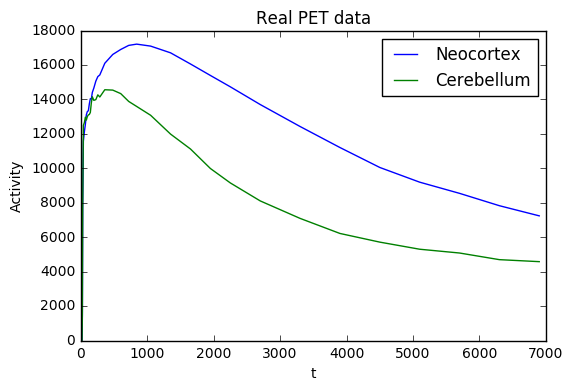

In [3]:
table=pd.read_table('SB086-nonPVE.txt')
table.columns

t= pd.Series.as_matrix(np.mean(table.iloc[:,[0, 1]], axis=1))
diff=np.diff(table.iloc[:,[0, 1]], axis=1)
dt=np.reshape(diff, np.product(diff.shape))
TAC=table.loc[:,'Neocortex']
refTAC=table.loc[:,'Total_cb']

fig, ax = plt.subplots();
ax.plot(t, TAC, label='Neocortex');
ax.plot(t, refTAC, label='Cerebellum');
ax.set_xlabel('t');
ax.set_ylabel('Activity');
ax.set_title('Real PET data');
ax.legend();

In [4]:
# Initialize SRTM Lammerstma 1996 model
mdl_lammertsma = SRTM_Lammertsma1996(t, dt, TAC, refTAC)
# note that we need to give time t and midtime dt in units of minutes!!! Will add that to srtm code

# fit model
mdl_lammertsma.fit();

# get model results
mdl_lammertsma.results

{'BP': array([ 0.58339666]),
 'R1': array([ 0.9656522]),
 'akaike': array([ 537.00975355]),
 'err': array([ 41.37355551]),
 'fpe': array([ 3053396.86530128]),
 'k2': array([ 0.07252277]),
 'logl': array([-264.50487677]),
 'mse': array([ 72699.92536432])}

In [5]:
# Initialize SRTM Zhou 2003 model
mdl_zhou = SRTM_Zhou2003(t, dt, TAC, refTAC)

mdl_zhou.fit();

mdl_zhou.results

{'BP': array([ 0.58445412]),
 'R1': array([ 0.96389944]),
 'R1_lrsc': array([ nan]),
 'k2': array([ 0.00121923]),
 'k2_lrsc': array([ nan]),
 'k2a': array([ 0.0007681]),
 'k2a_lrsc': array([ nan]),
 'noiseVar_eqDVR': array([  2.19203284e+13]),
 'noiseVar_eqR1': array([ 13430953.72611751])}